In [45]:
import tensorflow as tf

# GPU를 사용할 수 있는지 확인
gpu_available = tf.config.list_physical_devices('GPU')

if gpu_available:
    print("GPU를 사용할 수 있습니다.")
    # GPU 디바이스 정보 출력
    for gpu in gpu_available:
        print("GPU 디바이스:", gpu)
else:
    print("GPU를 사용할 수 없습니다.")

GPU를 사용할 수 있습니다.
GPU 디바이스: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

from pandas import read_csv, unique

import numpy as np
import pandas as pd

from scipy.interpolate import interp1d
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [1]:
import pandas as pd

filepath = 'D:/dataset/Daphnet/'
# Load all 9 files as a list
filenames = [
    'S01R01.txt', 'S01R02.txt', 'S02R01.txt', 'S02R02.txt', 'S03R01.txt', 'S03R02.txt',
    'S03R03.txt', 'S04R01.txt', 'S05R01.txt', 'S05R02.txt', 'S06R01.txt', 'S06R02.txt',
    'S07R02.txt', 'S08R01.txt', 'S09R01.txt', 'S10R01.txt'
]

# Create an empty list to store DataFrames
dfs = []

# Iterate over each filename, load the CSV file, and append the DataFrame to the list
for filename in filenames:
    df = pd.read_csv(filepath + filename, sep="\s+", header=None)
    user_number = int(filename[1:3])
    df['User_Number'] = user_number
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Set column names
columns = "TS,Ankel_1,Ankel_2,Ankel_3,Thigh_1,Thigh_2,Thigh_3,Trunk_1,Trunk_2,Trunk_3,status,subject".split(",")
df.columns = columns

print(df)

              TS  Ankel_1  Ankel_2  Ankel_3  Thigh_1  Thigh_2  Thigh_3  \
0             15       70       39     -970        0        0        0   
1             31       70       39     -970        0        0        0   
2             46       60       49     -960        0        0        0   
3             62       60       49     -960        0        0        0   
4             78       50       39     -960        0        0        0   
...          ...      ...      ...      ...      ...      ...      ...   
1798357  3020296     -131      107     -960        0        0        0   
1798358  3020312     -121      127     -970        0        0        0   
1798359  3020328     -141      117     -960        0        0        0   
1798360  3020343     -131      127     -980        0        0        0   
1798361  3020359     -141        0        0        0        0        0   

         Trunk_1  Trunk_2  Trunk_3  status  subject  
0              0        0        0       0        1  
1  

In [2]:
df['status'].value_counts()

status
1    959685
0    731768
2    106909
Name: count, dtype: int64

In [3]:
# status 열에서 값이 0인 행 제거
df = df[df['status'] != 0]

# status 열에서 값이 1인 행을 0으로, 값이 2인 행을 1로 바꾸기
df['status'] = df['status'].replace({1: 0, 2: 1})

In [4]:
df.columns

Index(['TS', 'Ankel_1', 'Ankel_2', 'Ankel_3', 'Thigh_1', 'Thigh_2', 'Thigh_3',
       'Trunk_1', 'Trunk_2', 'Trunk_3', 'status', 'subject'],
      dtype='object')

In [5]:
df = df[['Ankel_1', 'Ankel_2', 'Ankel_3', 'Thigh_1', 'Thigh_2', 'Thigh_3',
       'Trunk_1', 'Trunk_2', 'Trunk_3', 'status', 'subject']]

In [6]:
df

,Ankel_1,Ankel_2,Ankel_3,Thigh_1,Thigh_2,Thigh_3,Trunk_1,Trunk_2,Trunk_3,status,subject
47999,-30,990,326,-45,972,181,-38,1000,29,0,1
48000,-30,1000,356,-18,981,212,-48,1028,29,0,1
48001,-20,990,336,18,981,222,-38,1038,9,0,1
48002,-20,1000,316,36,990,222,-19,1038,9,0,1
48003,0,990,316,36,990,212,-29,1038,29,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1790654,-505,823,336,0,0,0,0,0,0,0,10
1790655,-505,823,336,0,0,0,0,0,0,0,10
1790656,-505,823,336,0,0,0,0,0,0,0,10
1790657,-505,823,336,0,0,0,0,0,0,0,10


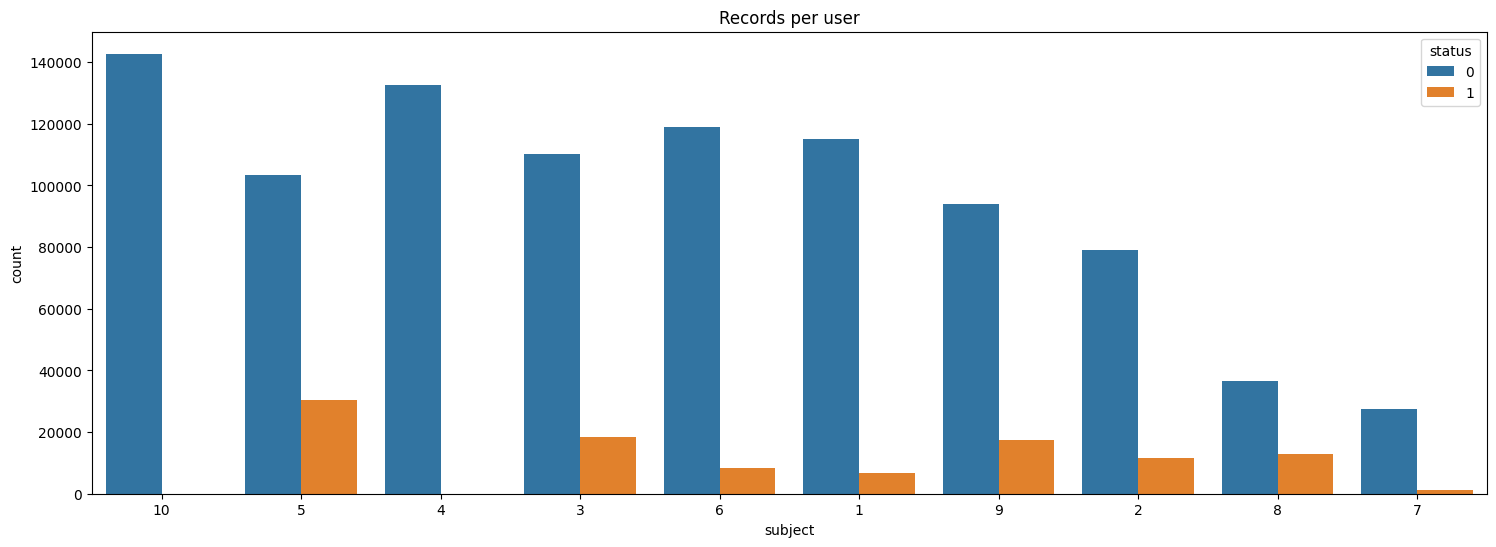

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))
sns.countplot(x = "subject", hue="status", data = df,
              order = df.subject.value_counts().index)
plt.title("Records per user");

In [10]:
df = df[['Ankel_1', 'Ankel_2', 'Ankel_3', 'Thigh_1', 'Thigh_2', 'Thigh_3',
       'Trunk_1', 'Trunk_2', 'Trunk_3', 'status']]

In [31]:
X=df.drop('status',axis=1)
X.head()
y=df['status']
y.value_counts()

status
0    959685
1    106909
Name: count, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((853275, 9), (853275,), (213319, 9), (213319,))

In [33]:
from sklearn.preprocessing import OneHotEncoder

y_train_hot = pd.get_dummies(y_train).values
y_test_hot = pd.get_dummies(y_test).values

In [34]:
y_train_hot.shape, y_test_hot.shape

((853275, 2), (213319, 2))

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from keras.layers import Conv1D, LSTM, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [36]:
n_features, n_outputs = X_train.shape[1], y_train_hot.shape[1]

In [37]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(n_features,)))
model.add(Dense(128))
model.add(Flatten())
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640       
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 9,218
Trainable params: 9,218
Non-trainable params: 0
_________________________________________________________________


In [38]:
epochs, batch_size = 10, 128
history = model.fit(X_train, y_train_hot, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.1, shuffle=True)

Epoch 1/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.6772 - accuracy: 0.8830 - val_loss: 0.2933 - val_accuracy: 0.8968
Epoch 2/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.2838 - accuracy: 0.8989 - val_loss: 0.2842 - val_accuracy: 0.8983
Epoch 3/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.2783 - accuracy: 0.9000 - val_loss: 0.2797 - val_accuracy: 0.8986
Epoch 4/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.2732 - accuracy: 0.9000 - val_loss: 0.2718 - val_accuracy: 0.8985
Epoch 5/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.2687 - accuracy: 0.9000 - val_loss: 0.2706 - val_accuracy: 0.8981
Epoch 6/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.2659 - accuracy: 0.9000 - val_loss: 0.2672 - val_accuracy: 0.8983
Epoch 7/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.2649 - accuracy: 0.9001 - val_loss: 0.2695 - val_ac

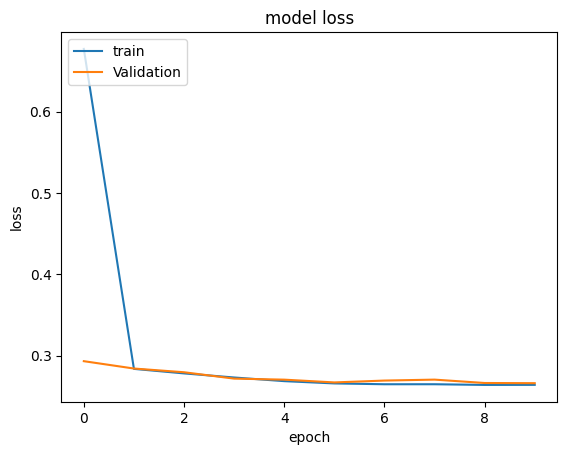

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

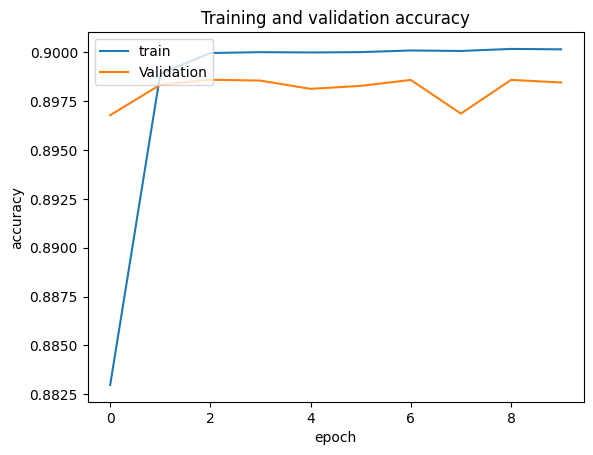

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

6667/6667 [==============================] - 5s 720us/step
f1_score =  0.8549828521594234
0.8990807194858405
              precision    recall  f1-score   support

           0       0.90      1.00      0.95    191741
           1       0.53      0.02      0.04     21578

    accuracy                           0.90    213319
   macro avg       0.72      0.51      0.49    213319
weighted avg       0.86      0.90      0.85    213319



<Axes: >

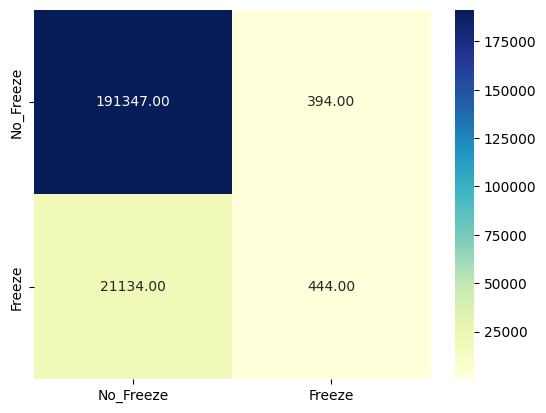

In [42]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import numpy as np

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['No_Freeze','Freeze']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [49]:
df['status'].value_counts()

status
0    959685
1    106909
Name: count, dtype: int64

In [50]:
Normal = df[df['status'] == 0]  # 레이블이 'Yes'인 행만 선택
Abnormal = df[df['status'] == 1]    # 레이블이 'No'인 행만 선택

In [51]:
X=df.drop('status',axis=1)
X.head()
y=df['status']
y.value_counts()

status
0    959685
1    106909
Name: count, dtype: int64

In [56]:
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# sMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 증강된 데이터셋 확인
print("Original dataset shape:", X.shape)
print("Resampled dataset shape:", X_resampled.shape)
print("\nOriginal label distribution:")
print(y.value_counts())
print("\nResampled label distribution:")
print(pd.Series(y_resampled).value_counts())

Original dataset shape: (1066594, 9)
Resampled dataset shape: (1919370, 9)

Original label distribution:
status
0    959685
1    106909
Name: count, dtype: int64

Resampled label distribution:
status
0    959685
1    959685
Name: count, dtype: int64


In [80]:
result = pd.concat([X_resampled, y_resampled], axis=1)

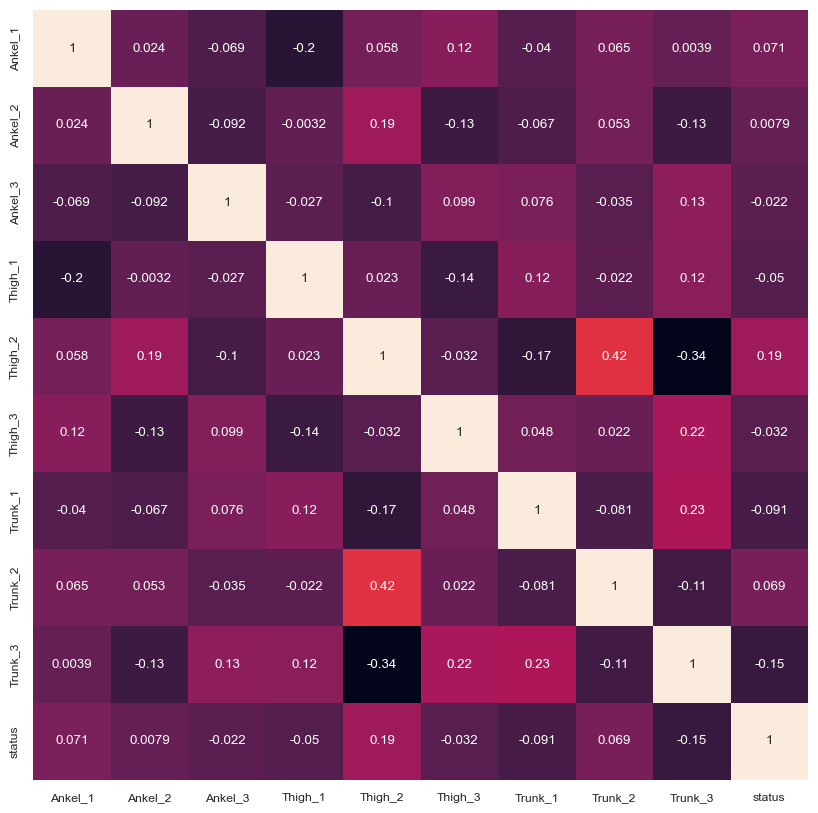

In [82]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

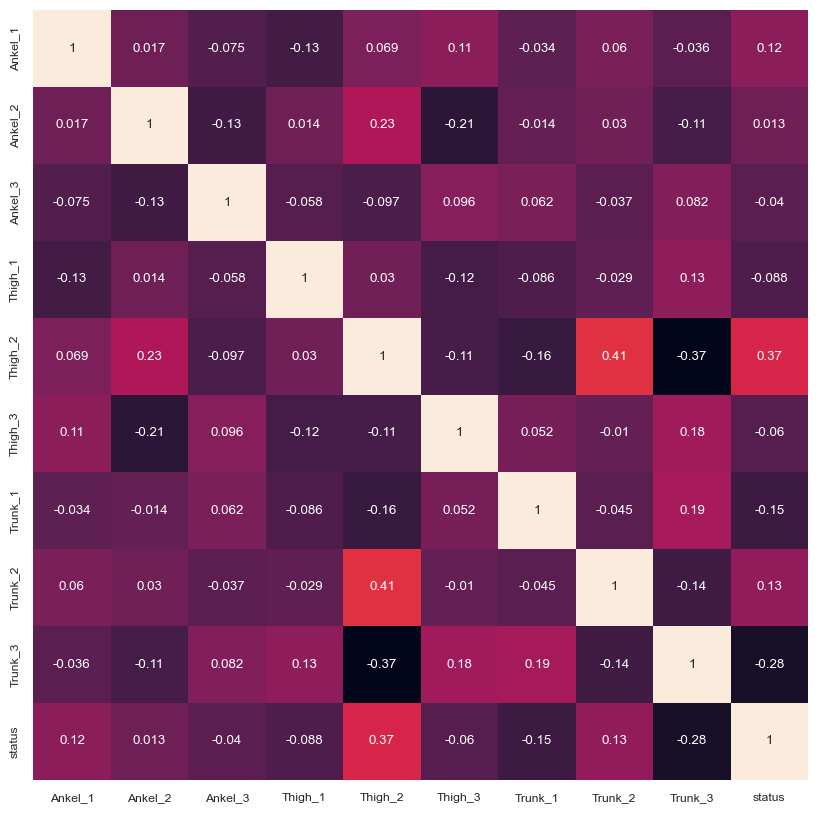

In [83]:
df_corr=result.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [102]:
Normal2 = result[result['status'] == 0]  # 레이블이 'Yes'인 행만 선택
Abnormal2 = result[result['status'] == 1]    # 레이블이 'No'인 행만 선택

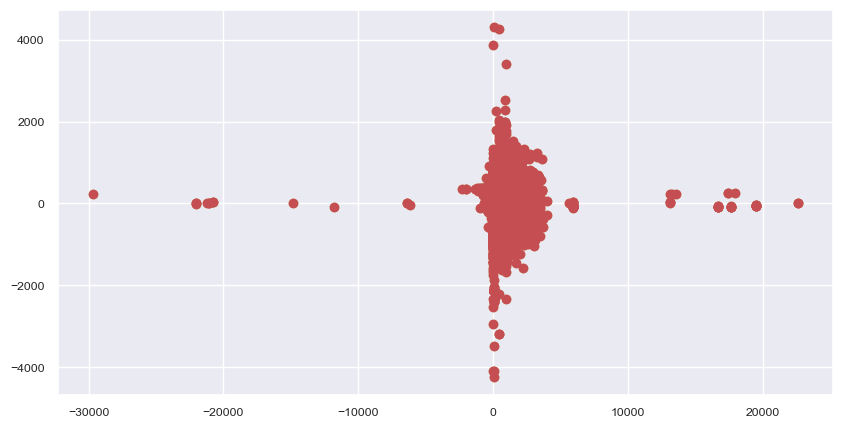

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(Normal2['Thigh_2'], Normal2['Trunk_3'], c='y', label='status')
plt.scatter(Normal['Thigh_2'], Normal['Trunk_3'], c='r', label='status')

plt.show()  

In [115]:
Normal2

,Ankel_1,Ankel_2,Ankel_3,Thigh_1,Thigh_2,Thigh_3,Trunk_1,Trunk_2,Trunk_3,status
0,-30,990,326,-45,972,181,-38,1000,29,0
1,-30,1000,356,-18,981,212,-48,1028,29,0
2,-20,990,336,18,981,222,-38,1038,9,0
3,-20,1000,316,36,990,222,-19,1038,9,0
4,0,990,316,36,990,212,-29,1038,29,0
...,...,...,...,...,...,...,...,...,...,...
1066589,-505,823,336,0,0,0,0,0,0,0
1066590,-505,823,336,0,0,0,0,0,0,0
1066591,-505,823,336,0,0,0,0,0,0,0
1066592,-505,823,336,0,0,0,0,0,0,0


In [112]:
# 두 데이터프레임을 조인
merged_df = pd.merge(Normal, Normal2, how='outer', indicator=True)

# 중복된 행 제거
merged_df = merged_df.drop_duplicates(subset=['Thigh_2', 'Trunk_3'])
print(merged_df)

         Ankel_1  Ankel_2  Ankel_3  Thigh_1  Thigh_2  Thigh_3  Trunk_1  \
0         -31234    15363    17409        0        0        0        0   
53         -6682    24577     9474      -72     -203     -808       87   
54         -5010    -3480       59     3827     1564     -242     -106   
55         -5010      892     4752     3700     1879     -292     -446   
56         -5010     1009     3396     1254      509      404      330   
...          ...      ...      ...      ...      ...      ...      ...   
1315649     5090      -39     3900      400     1972      353     -116   
1315688     5131     2254     3138    -2145     1425     -464      203   
1315714     5151     2372    -2257     -590       74     -393     -368   
1315724     5151     4617    -2118     2936     1787     1929     -718   
1315736     5161     4147    -2366     3590     1064     1696     -436   

         Trunk_2  Trunk_3  status _merge  
0              0        0       0   both  
53           942      359

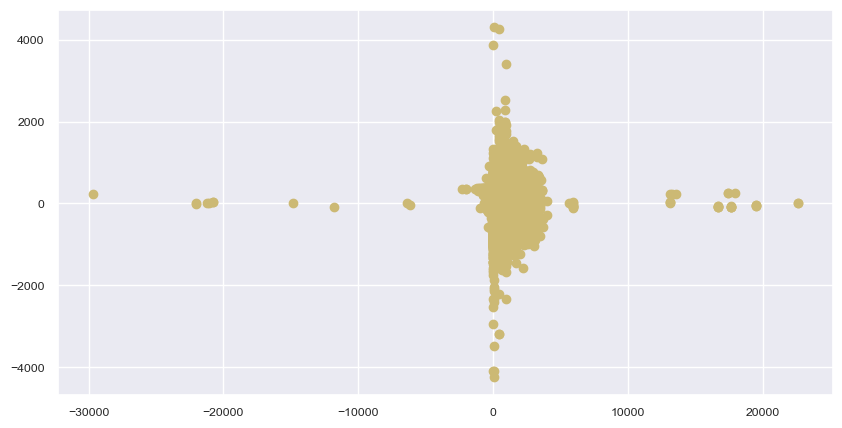

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(merged_df['Thigh_2'], merged_df['Trunk_3'], c='y', label='status')

plt.show()  

In [110]:
if Normal.equals(Normal2):
    print("두 데이터프레임은 동일합니다.")
else:
    print("두 데이터프레임은 동일하지 않습니다.")

두 데이터프레임은 동일하지 않습니다.


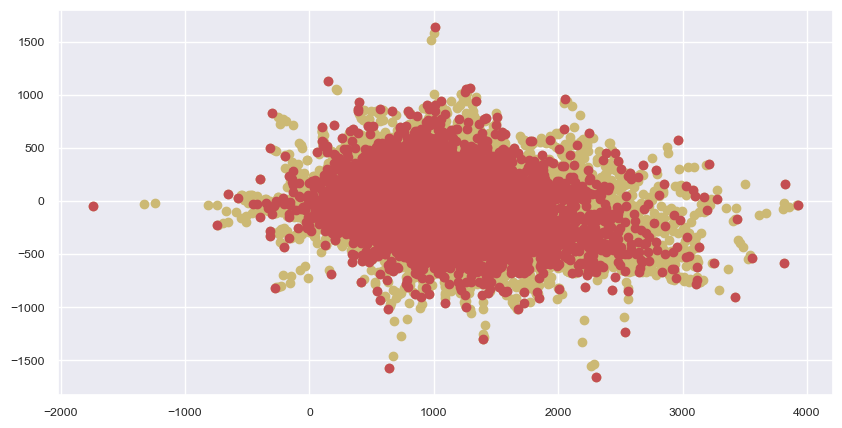

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(Abnormal2['Thigh_2'], Abnormal2['Trunk_3'], c='y', label='status')
plt.scatter(Abnormal['Thigh_2'], Abnormal['Trunk_3'], c='r', label='status')
plt.show()  

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1535496, 9), (1535496,), (383874, 9), (383874,))

In [72]:
from sklearn.preprocessing import OneHotEncoder

y_train_hot = pd.get_dummies(y_train).values
y_test_hot = pd.get_dummies(y_test).values

In [73]:
n_features, n_outputs = X_train.shape[1], y_train_hot.shape[1]

In [74]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(n_features,)))
model.add(Dense(128))
model.add(Flatten())
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                640       
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 2)                 258       
                                                                 
Total params: 9,218
Trainable params: 9,218
Non-trainable params: 0
_________________________________________________________________


In [75]:
epochs, batch_size = 10, 128
history = model.fit(X_train, y_train_hot, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.1, shuffle=True)

Epoch 1/10
10797/10797 [==============================] - 22s 2ms/step - loss: 0.9172 - accuracy: 0.7330 - val_loss: 0.4991 - val_accuracy: 0.7718
Epoch 2/10
10797/10797 [==============================] - 21s 2ms/step - loss: 0.5002 - accuracy: 0.7563 - val_loss: 0.4806 - val_accuracy: 0.7615
Epoch 3/10
10797/10797 [==============================] - 21s 2ms/step - loss: 0.4749 - accuracy: 0.7644 - val_loss: 0.4670 - val_accuracy: 0.7655
Epoch 4/10
10797/10797 [==============================] - 21s 2ms/step - loss: 0.4669 - accuracy: 0.7706 - val_loss: 0.4660 - val_accuracy: 0.7725
Epoch 5/10
10797/10797 [==============================] - 22s 2ms/step - loss: 0.4636 - accuracy: 0.7730 - val_loss: 0.4684 - val_accuracy: 0.7739
Epoch 6/10
10797/10797 [==============================] - 21s 2ms/step - loss: 0.4627 - accuracy: 0.7740 - val_loss: 0.4614 - val_accuracy: 0.7734
Epoch 7/10
10797/10797 [==============================] - 22s 2ms/step - loss: 0.4610 - accuracy: 0.7747 - val_loss: 0

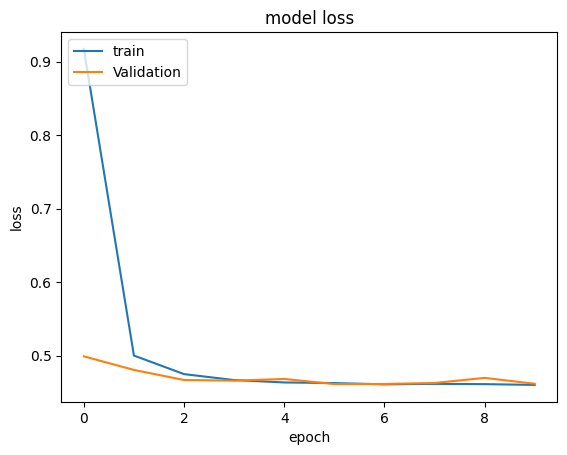

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

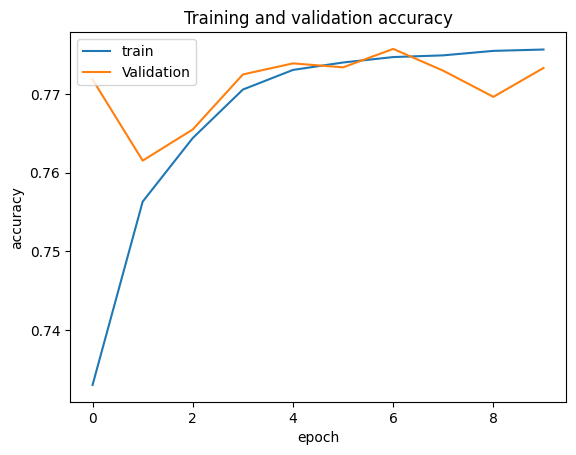

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

11997/11997 [==============================] - 8s 659us/step
f1_score =  0.5823979562578149
0.5891308085465543
              precision    recall  f1-score   support

           0       0.62      0.46      0.53    191771
           1       0.57      0.72      0.64    192103

    accuracy                           0.59    383874
   macro avg       0.60      0.59      0.58    383874
weighted avg       0.60      0.59      0.58    383874



<Axes: >

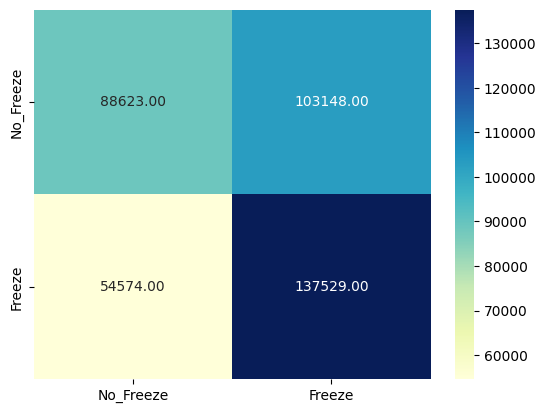

In [79]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import numpy as np

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['No_Freeze','Freeze']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [118]:
import pandas as pd

result2 = pd.DataFrame()
result2 = pd.concat([Normal, Abnormal2])
result2['status'].value_counts()

status
0    959685
1    959685
Name: count, dtype: int64

In [119]:
X=result2.drop('status',axis=1)
X.head()
y=result2['status']
y.value_counts()

status
0    959685
1    959685
Name: count, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1535496, 9), (1535496,), (383874, 9), (383874,))

In [121]:
from sklearn.preprocessing import OneHotEncoder

y_train_hot = pd.get_dummies(y_train).values
y_test_hot = pd.get_dummies(y_test).values

In [122]:
from sklearn.preprocessing import OneHotEncoder

y_train_hot = pd.get_dummies(y_train).values
y_test_hot = pd.get_dummies(y_test).values

In [123]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(n_features,)))
model.add(Dense(128))
model.add(Flatten())
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                640       
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 flatten_4 (Flatten)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 2)                 258       
                                                                 
Total params: 9,218
Trainable params: 9,218
Non-trainable params: 0
_________________________________________________________________


In [124]:
epochs, batch_size = 10, 128
history = model.fit(X_train, y_train_hot, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.1, shuffle=True)

Epoch 1/10
10797/10797 [==============================] - 23s 2ms/step - loss: 0.9988 - accuracy: 0.7207 - val_loss: 0.5466 - val_accuracy: 0.7373
Epoch 2/10
10797/10797 [==============================] - 22s 2ms/step - loss: 0.4983 - accuracy: 0.7585 - val_loss: 0.4786 - val_accuracy: 0.7664
Epoch 3/10
10797/10797 [==============================] - 22s 2ms/step - loss: 0.4702 - accuracy: 0.7706 - val_loss: 0.4646 - val_accuracy: 0.7686
Epoch 4/10
10797/10797 [==============================] - 22s 2ms/step - loss: 0.4605 - accuracy: 0.7759 - val_loss: 0.4594 - val_accuracy: 0.7761
Epoch 5/10
10797/10797 [==============================] - 21s 2ms/step - loss: 0.4580 - accuracy: 0.7781 - val_loss: 0.4545 - val_accuracy: 0.7796
Epoch 6/10
10797/10797 [==============================] - 21s 2ms/step - loss: 0.4554 - accuracy: 0.7803 - val_loss: 0.4593 - val_accuracy: 0.7807
Epoch 7/10
10797/10797 [==============================] - 21s 2ms/step - loss: 0.4550 - accuracy: 0.7813 - val_loss: 0

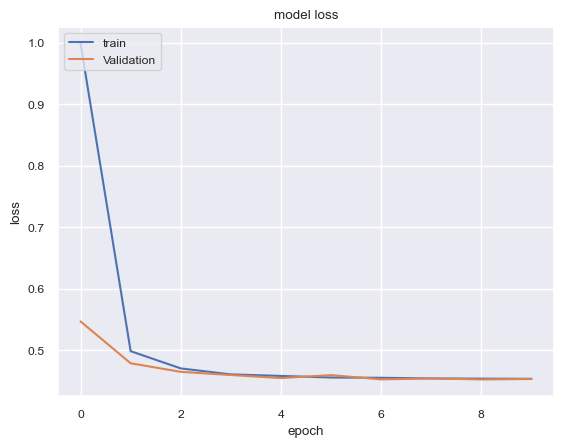

In [125]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

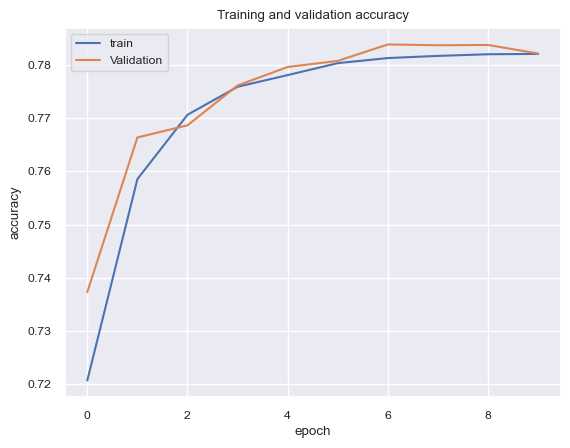

In [126]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

11997/11997 [==============================] - 8s 693us/step
f1_score =  0.7819128617200731
0.7833950723414453
              precision    recall  f1-score   support

           0       0.84      0.70      0.76    191760
           1       0.74      0.87      0.80    192114

    accuracy                           0.78    383874
   macro avg       0.79      0.78      0.78    383874
weighted avg       0.79      0.78      0.78    383874



<Axes: >

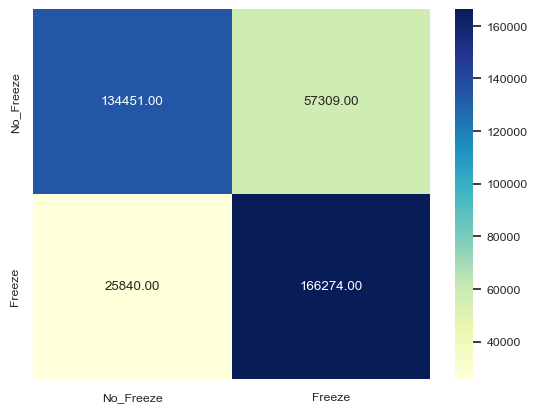

In [128]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import numpy as np

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['No_Freeze','Freeze']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [129]:
result2['status'].value_counts()

status
0    959685
1    959685
Name: count, dtype: int64